**Reg. No. : RA1811027010080**

**Name : Ayushman Chaudhary**

**Exp 8-**
**Implementation of Knowledge Representation**

**Manual Process**

![title](KnowledgeGraph.jpeg)

**Code -**

In [78]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [75]:
import spacy

text = "The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). Founded in 2008, the team plays its home matches at the M. A. Chidambaram Stadium in Chennai. The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). They hold the records of most appearances in the playoffs (ten) and the Final (eight) of the IPL. In addition, they have also won the Champions League Twenty20 in 2010 and 2014. The brand value of the Super Kings in 2019 is estimated to be around ₹732 crore (roughly $104 million), making them the second-most valuable IPL franchise, after the Mumbai Indians."
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

for token in doc:
    print(token.text, "->", token.dep_)

The -> det
Chennai -> compound
Super -> compound
Kings -> nsubj
( -> punct
CSK -> appos
) -> punct
are -> ROOT
a -> det
franchise -> compound
cricket -> compound
team -> attr
based -> acl
in -> prep
Chennai -> pobj
, -> punct
Tamil -> compound
Nadu -> appos
, -> punct
which -> nsubj
plays -> relcl
in -> prep
the -> det
Indian -> amod
Premier -> compound
League -> pobj
( -> punct
IPL -> appos
) -> punct
. -> punct
Founded -> advcl
in -> prep
2008 -> pobj
, -> punct
the -> det
team -> nsubj
plays -> ROOT
its -> poss
home -> compound
matches -> dobj
at -> prep
the -> det
M. -> compound
A. -> compound
Chidambaram -> compound
Stadium -> pobj
in -> prep
Chennai -> pobj
. -> punct
The -> det
team -> nsubj
served -> ROOT
a -> det
two -> nummod
- -> punct
year -> compound
suspension -> dobj
from -> prep
the -> det
IPL -> pobj
starting -> advcl
July -> npadvmod
2015 -> nummod
for -> prep
the -> det
alleged -> amod
involvement -> pobj
of -> prep
their -> poss
owners -> pobj
in -> prep
the -> det


In [72]:
# Append the tokens to the subject/relation/object strings
def appendChunk(original, chunk):
    return original + ' ' + chunk

# check dependency of token and relation with head
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)     #any() returns true if any iterable comes true

# check for subject and object construction
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

# this will finally returns subject,relation, object triplets for each sentence in the text
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        
        if "punct" in token.dep_:                                                        # If the token is a punctuation, then skip
            continue

        if isRelationCandidate(token):                                                   # If the token is a relation, then append it to the relation string
            relation = appendChunk(relation, token.lemma_)
        
        if isConstructionCandidate(token):                                               # If the token is a subject/object, then append it to the subject/object construction strings respectively
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        
        if "subj" in token.dep_:                                                          # Checking for subjects and appending the same to the respective string
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        
        if "obj" in token.dep_:                                                           # Checking for objects (if left out) and appending the same to the respective string
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    return (subject.strip(), relation.strip(), object.strip())                            # returns final value- triplet of subject,relation and object


def processSentence(sentence):                                                            # creating sentence into tokens and later on making triplets from thos tokens
    tokens = nlp(sentence)
    return processSubjectObjectPairs(tokens)

triples = []
sentences = list(doc.sents)                                                              #seperates the sentence from fullstop(.)

for sentence in sentences:
    # Triplets for each sentence are appended to the list 'triples'
    triples.append(processSentence(str(sentence)))

print(triples) # Printing of all triplets

[('Kings which', 'be team Indian', 'Chennai League'), ('team', 'play', '2008 matches Stadium Chennai'), ('team', 'serve alleged', 'suspension IPL involvement owners case title season'), ('team', 'captain by by', 'Dhoni Fleming'), ('Kings', 'lift high', 'thrice 2010 percentage matches teams IPL'), ('They', 'hold most', 'records appearances playoffs IPL'), ('they', 'win', 'addition Twenty20 2010'), ('value them', 'estimate valuable', 'Kings 2019 crore Indians')]


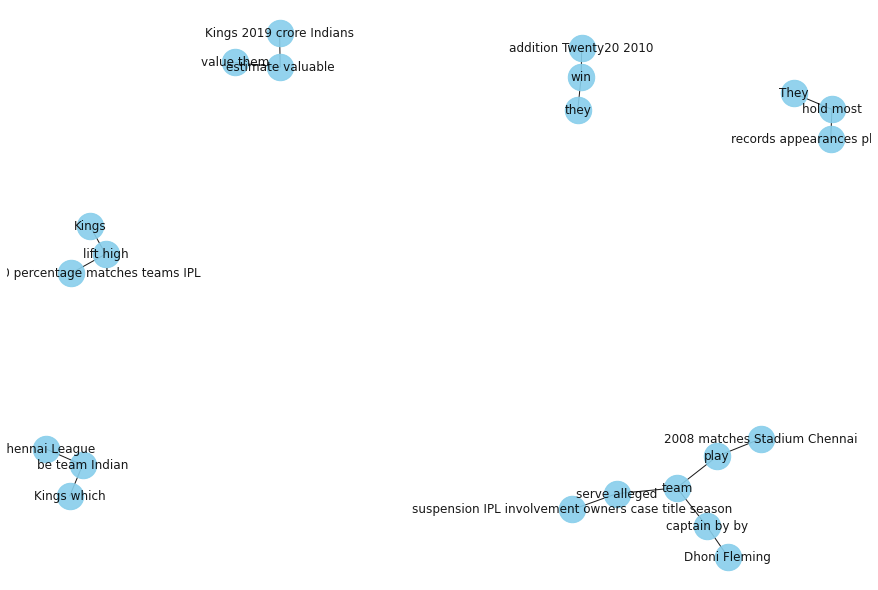

In [73]:
import networkx as nx                                  #networkx is used for creation of graphs

import matplotlib.pyplot as plt

def printGraph(triples):   
    G = nx.Graph()       #creates graph with 0 nodes and 0 edges
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)                 #returns dict with positions
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,                #drawing the graph
            node_size=700, node_color='skyblue', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()
    
printGraph(triples)

In [77]:
def is_token_allowed(token):
    if (not token or token.is_stop or token.is_punct):
        return False
    return True

def preprocess_token(token):
    return token.lemma_.strip().lower()              #lemma will converts text in 2nd and 3rd form to their 1st form , like - asking->ask, slept->sleep
                                #strip will clear all whitespaces from start and end


while True:
    ques = input('Ask me anything (from the input) (Enter 0 to Exit): ')        
    if (ques == '0'):                #when 0 is entered, break the loop
        break
    
    qdoc = nlp(ques)

    ques_token = [preprocess_token(token) for token in qdoc if is_token_allowed(token)]          #check for token eligibility and then preprocess it
    
    print('Answer: ', end = "")
    for sentence in sentences:
        # Preprocessing the tokens in each sentence
        final_token = [preprocess_token(token) for token in sentence if is_token_allowed(token)]         #check for final tokens
        for qtoken in ques_token:
            if qtoken in final_token:
                print(sentence, end = " ")                     #returns the answer
                break
    
    print()
    print()

Ask me anything (from the input) (Enter 0 to Exit): Who is the captain of CSK?
Answer: The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. 

Ask me anything (from the input) (Enter 0 to Exit): What is winning percentage of CSK?
Answer: The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). In addition, they have also won the Champions League Twenty20 in 2010 and 2014. 

Ask me anything (from the input) (En

   ....

**Result -**

The knowledge graph was constructed for the given input text and the user questions were answered successfully.